In [ ]:
# Import neccessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# Load the dataset from a CSV file
df = pd.read_csv('chronic_kidney_disease.csv')

In [ ]:
# Display the first 5 rows of the dataset
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Display the last 5 rows of the dataset
df.tail(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [ ]:
# Display the shape of the dataset (number of rows and columns)
df.shape

(400, 25)

In [ ]:
# Identify duplicate rows in the dataset
df[df.duplicated()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Check for missing values in each column
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
# Identify rows with missing values
missing_value = df[df.isnull().sum(axis=1) > 0]
print(f"Number of missing values: {len(missing_value)}")

Number of missing values: 242


In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
# Verify that no missing values remain
missing_value = df[df.isnull().sum(axis=1) > 0]
print(f"Number of missing values: {len(missing_value)}")

Number of missing values: 0


In [ ]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Get the unique values in the current column
    unique_values = df[column].unique()

    # Print the column name and its unique values
    print(f"{column}: {unique_values}")
    print()

age: [48. 53. 63. 68. 61. 69. 73. 46. 56. 59. 71. 52. 50. 70. 60. 55. 62. 83.
 21. 45. 64.  6. 49. 40. 23. 57. 51. 34. 38. 42. 35. 30. 25. 24. 20. 33.
 66. 47. 41. 44. 43. 39. 58. 65. 32. 37. 22. 29. 74. 75. 28. 72. 79. 80.
 15. 36. 12. 17.]

bp: [ 70.  90.  80.  60. 100.  50. 110.]

sg: [1.005 1.02  1.01  1.015 1.025]

al: [4. 2. 3. 0. 1.]

su: [0. 2. 4. 1. 3. 5.]

rbc: ['normal' 'abnormal']

pc: ['abnormal' 'normal']

pcc: ['present' 'notpresent']

ba: ['notpresent' 'present']

bgr: [117.  70. 380. 157. 173.  95. 264. 253. 163. 129. 133.  76. 280. 210.
 219. 295. 118. 224. 128. 105. 288. 273. 122. 303. 102. 107. 239.  94.
 252. 255. 214. 490. 241. 106. 424. 176. 140.  82. 119.  99. 121. 131.
  91.  98. 104. 132.  97. 111.  96. 139. 125. 123. 112. 130. 100.  81.
  93. 124.  89. 127. 137. 120. 109.  80. 134.  92.  88. 108.  83.  86.
  87.  79.  74.  78. 113.  75.  85. 114.]

bu: [ 56. 107.  60.  90. 148. 163.  87.  32. 142.  92. 139. 186.  35.  26.
  82. 125. 166. 208.  53.  36. 235.  

In [ ]:
# Initialize label encoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

# Apply encoding
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
print(df.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int32
pc         int32
pcc        int32
ba         int32
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int32
dm         int32
cad        int32
appet      int32
pe         int32
ane        int32
class      int32
dtype: object


# Data Analysis & Exploration

In [ ]:
# Compute the correlation matrix to identify relationships between numeric features
correlation_matrix = df.corr()
print(correlation_matrix)

            age        bp        sg        al        su       rbc        pc  \
age    1.000000  0.079712 -0.277303  0.253380  0.207711 -0.147971 -0.188907   
bp     0.079712  1.000000 -0.198897  0.322507  0.243828 -0.316670 -0.179834   
sg    -0.277303 -0.198897  1.000000 -0.712331 -0.448477  0.500494  0.630323   
al     0.253380  0.322507 -0.712331  1.000000  0.521448 -0.489941 -0.752956   
su     0.207711  0.243828 -0.448477  0.521448  1.000000 -0.256568 -0.335901   
rbc   -0.147971 -0.316670  0.500494 -0.489941 -0.256568  1.000000  0.498959   
pc    -0.188907 -0.179834  0.630323 -0.752956 -0.335901  0.498959  1.000000   
pcc    0.124032  0.206507 -0.460050  0.503341  0.177327 -0.168592 -0.600092   
ba     0.068353  0.174555 -0.516392  0.516104  0.381929 -0.273177 -0.481227   
bgr    0.301915  0.190113 -0.544781  0.518123  0.730050 -0.493857 -0.430646   
bu     0.190636  0.316287 -0.545319  0.661940  0.312259 -0.378478 -0.613318   
sc     0.189721  0.386551 -0.563122  0.702889  0.347

## Correlation Matrix

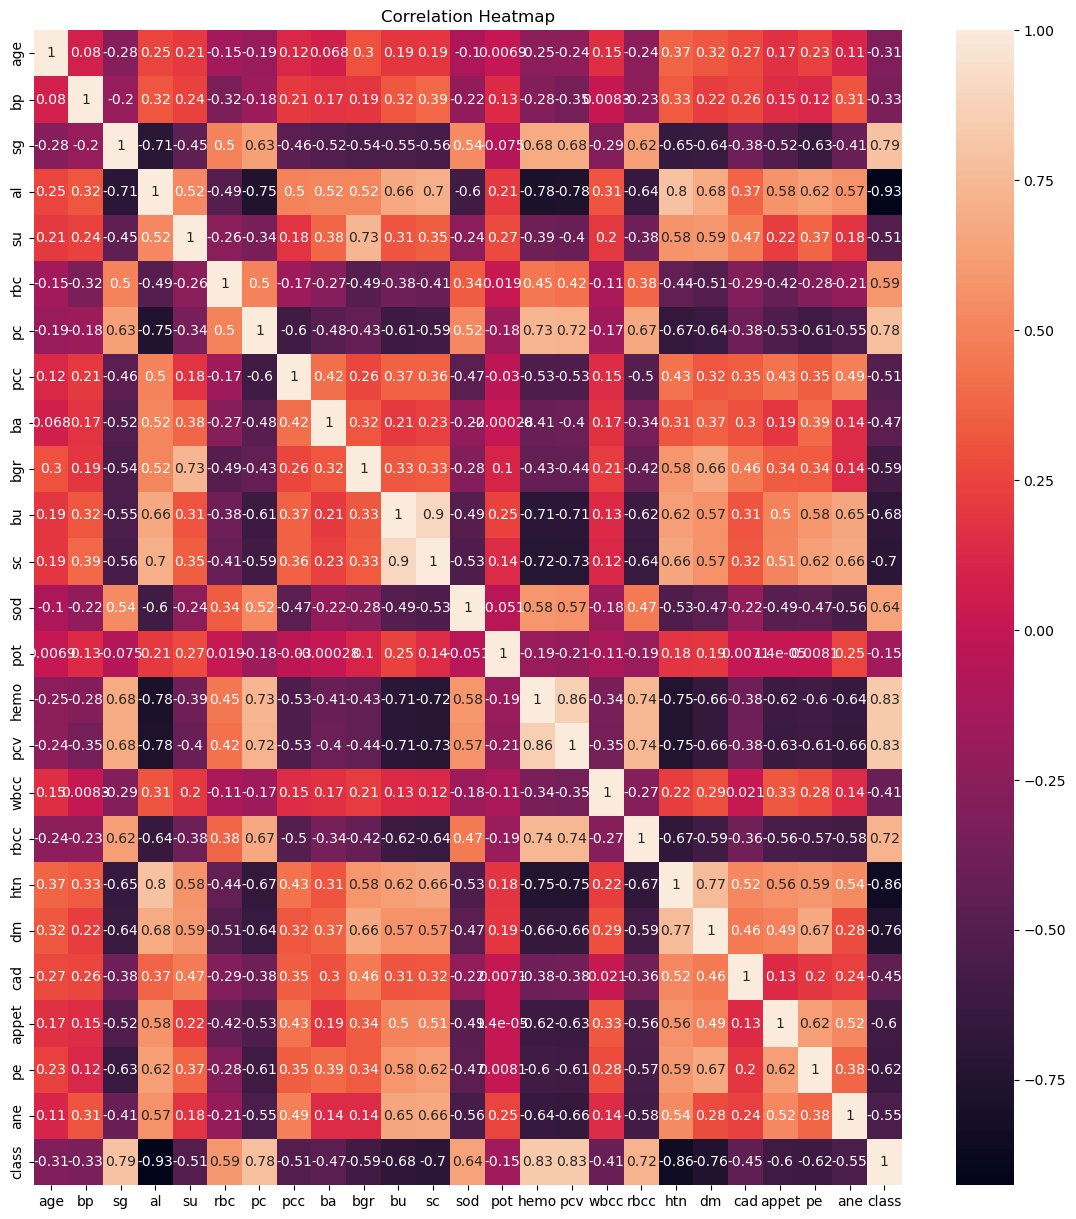

In [ ]:
#Plot the Correlation Matrix
plt.figure(figsize=(14, 15))
sns.heatmap(correlation_matrix, annot=True)

#Set the title
plt.title('Correlation Heatmap')

#Display the plot
plt.show()

## Bar Graph

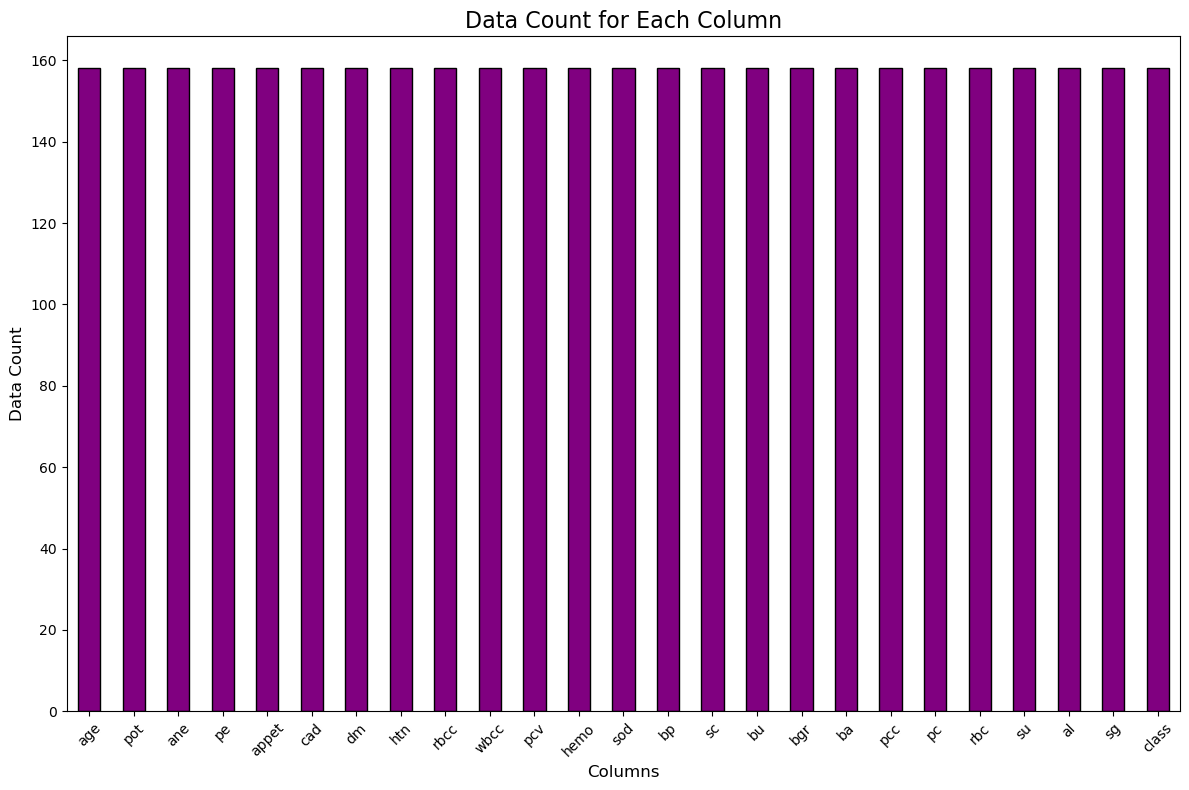

In [ ]:
# Calculate the number of non-null values for each column
data_count = df.notnull().sum()

# Plot the bar graph
plt.figure(figsize=(12, 8))
data_count.sort_values(ascending=False).plot(kind='bar', color='purple', edgecolor='black')

# Set the title and axis labels
plt.title('Data Count for Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Data Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Boxplot

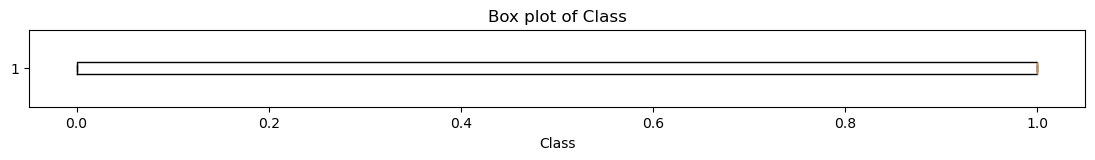

In [ ]:
# Boxplot for numerical columns
plt.figure(figsize=(30, 1))

# Create the second subplot (1 row, 2 columns, position 2)
plt.subplot(1, 2, 2)

# Create a box plot of the 'class' column
plt.boxplot(df['class'], vert=False)

# Set the title of the second subplot
plt.title('Box plot of Class')

# Set the label for the x-axis of the second subplot
plt.xlabel('Class')

# Display the plot
plt.show()

In [ ]:
# Calculate Z-scores for columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_columns].apply(zscore)

# Set a threshold for Z-scores
threshold = 3

# Find row where Z-scores are below the threshold
filtered_entries = (z_scores < threshold).all(axis=1)

# Remove outliers
df_no_outliers = df[filtered_entries]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers using Z-Score: {df_no_outliers.shape}")

Original dataset shape: (158, 25)
Dataset shape after removing outliers using Z-Score: (139, 25)


## Histogram

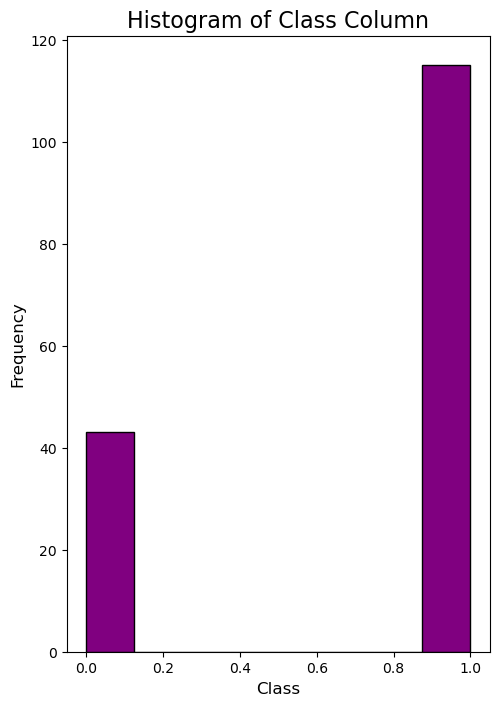

In [ ]:
# Histogram for a targeted column
plt.figure(figsize=(12, 8))

# Create a single subplot for the class column histogram
plt.subplot(1, 2, 1)

# Plot a histogram of the 'class' column using a countplot
plt.hist(df['class'], bins=8, color='purple', edgecolor='black')

# Set the title of the histogram
plt.title('Histogram of Class Column', fontsize=16)

# Set the label for the x-axis
plt.xlabel('Class', fontsize=12)

# Set the label for the y-axis
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

## Violin Plot

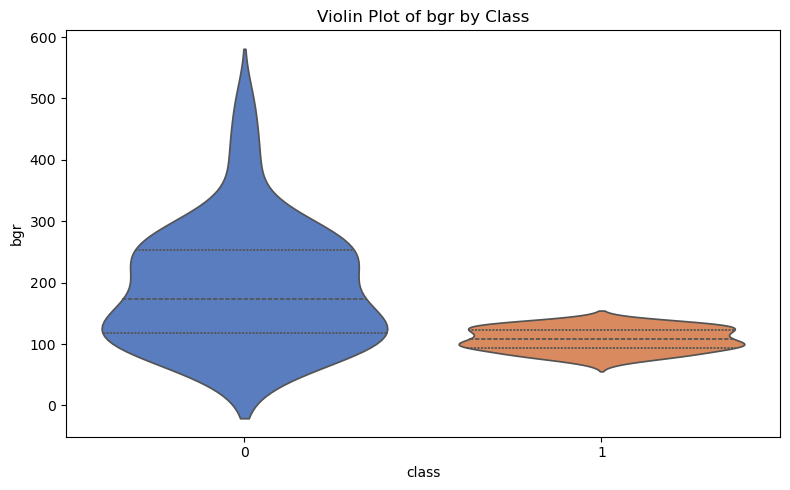

In [ ]:
# Plot the Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='class', y='bgr', hue='class', palette="muted", inner="quartile", legend=False)

#Set title
plt.title("Violin Plot of bgr by Class")

#Display the Plot
plt.tight_layout()
plt.show()

# Training Model

In [ ]:
# Features and target variable
x = df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = df['class']

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the features only for SVM (using StandardScaler)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']])
x_test_scaled = scaler.transform(x_test[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']])

In [ ]:
x_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
377,64.0,70.0,1.020,0.0,0.0,1,1,0,0,97.0,...,13.8,49.0,6400.0,4.8,0,0,0,0,0,0
262,55.0,80.0,1.020,0.0,0.0,1,1,0,0,118.0,...,15.5,43.0,7200.0,5.4,0,0,0,0,0,0
366,60.0,80.0,1.025,0.0,0.0,1,1,0,0,81.0,...,15.0,46.0,10500.0,5.3,0,0,0,0,0,0
307,47.0,60.0,1.020,0.0,0.0,1,1,0,0,137.0,...,13.6,44.0,7900.0,4.5,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,33.0,80.0,1.025,0.0,0.0,1,1,0,0,100.0,...,16.9,52.0,6700.0,6.0,0,0,0,0,0,0
341,63.0,70.0,1.025,0.0,0.0,1,1,0,0,130.0,...,13.4,41.0,7300.0,4.7,0,0,0,0,0,0
91,56.0,70.0,1.015,4.0,1.0,0,1,0,0,210.0,...,16.1,52.0,12500.0,5.6,0,0,0,0,0,0
320,57.0,60.0,1.020,0.0,0.0,1,1,0,0,105.0,...,15.7,44.0,10400.0,6.2,0,0,0,0,0,0


In [ ]:
y_train

377    1
262    1
366    1
307    1
396    1
      ..
284    1
341    1
91     0
320    1
337    1
Name: class, Length: 126, dtype: int32

In [ ]:
x.shape, y.shape

((158, 24), (158,))

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## XGBoost

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## Random Forest Training

In [ ]:
# Train Random Forest Classifier
print("Training Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predicting on test set
print("Predicting with Random Forest...")
rf_pred = rf.predict(x_test)

# Accuracy Score
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Training Random Forest Classifier...
Predicting with Random Forest...
Random Forest Accuracy: 100.00%


## SVM Training

In [ ]:
# Train SVM Classifier
print("Training SVM Classifier...")
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(x_train_scaled, y_train)

# Predicting on test set
print("Predicting with SVM...")
svm_pred = svm.predict(x_test_scaled)

# Accuracy Score
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

Training SVM Classifier...
Predicting with SVM...
SVM Accuracy: 100.00%


## XGBoost Training

In [ ]:
# Train XGBoost Classifier
print("Training XGBoost Classifier...")
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

# Predicting on test set
print("Predicting with XGBoost...")
xgb_pred = xgb.predict(x_test)

# Accuracy Score
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

Training XGBoost Classifier...
Predicting with XGBoost...
XGBoost Accuracy: 100.00%


## Comparision of Algorithm before Hypertuning

In [ ]:
# Accuracies of three algorithm
rf_accuracy = 1.0  # Random Forest
svm_accuracy = 1.0  # SVM
xgb_accuracy = 1.0  # XGBoost

In [ ]:
# Model names and accuracies
models = ['Random Forest', 'SVM', 'XGBoost']
accuracies_before = [rf_accuracy, svm_accuracy, xgb_accuracy]

## Line Plot Comparision of three alogirthm

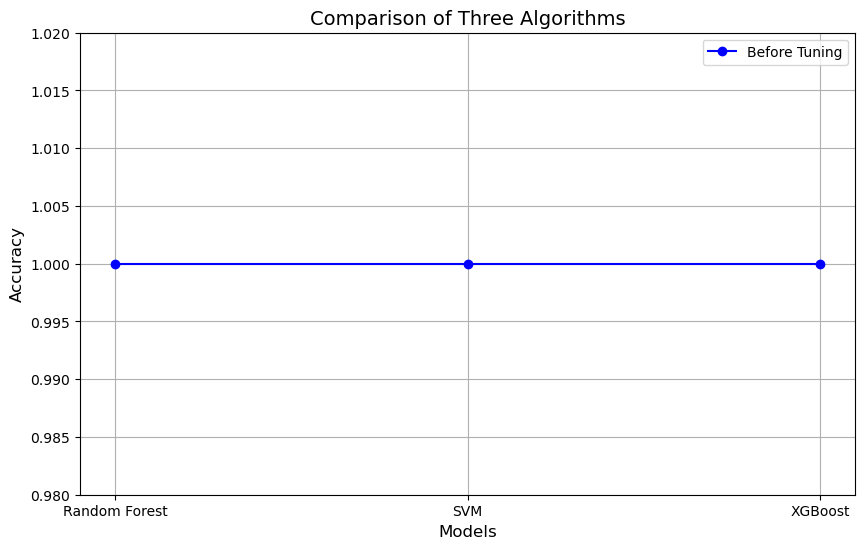

In [ ]:
# Plot the Line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies_before, marker='o', linestyle='-', color='blue', label='Before Tuning')

# Set title and lables
plt.title('Comparison of Three Algorithms', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the Plot
plt.ylim(0.98, 1.02)
plt.grid()
plt.legend()
plt.show()

## Bar Graph Comparision of three alogirthm

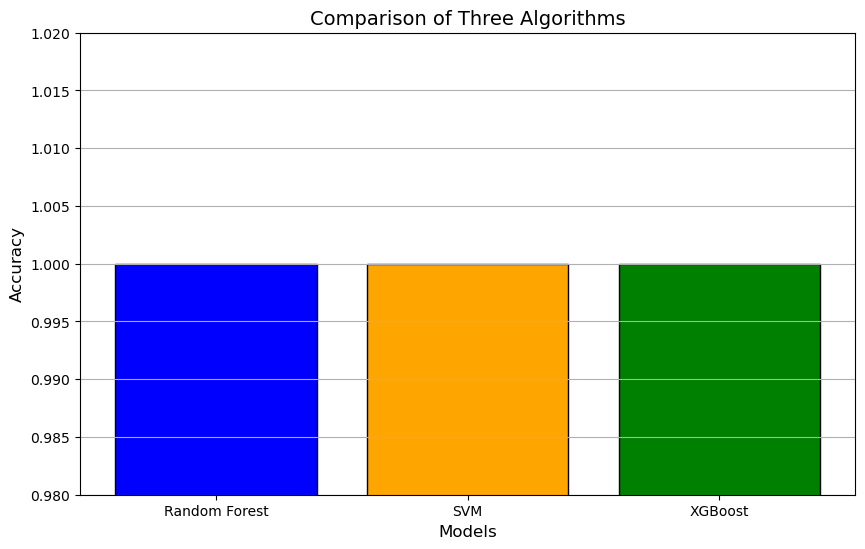

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_before, color=['blue', 'orange', 'green'], edgecolor='black')

# Set title and labels
plt.title('Comparison of Three Algorithms', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the graph
plt.ylim(0.98, 1.02)
plt.grid(axis='y')
plt.show()

## Random Forest Hyperparameter

In [ ]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search
rf_grid_search.fit(x_train, y_train)

# Best parameters and best score
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best Score for Random Forest: {rf_grid_search.best_score_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 1.0


## XGBoost Hyperparameter

In [ ]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Perform Grid Search
xgb_grid_search.fit(x_train, y_train)

# Best parameters and best score
print(f"Best Parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best Score for XGBoost: {xgb_grid_search.best_score_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score for XGBoost: 0.984


In [ ]:
# Evaluate the best Random Forest model
rf_best_model = rf_grid_search.best_estimator_
rf_test_pred = rf_best_model.predict(x_test)
print("Random Forest Test Classification Report:\n", classification_report(y_test, rf_test_pred))

# Evaluate the best XGBoost model
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_pred = xgb_best_model.predict(x_test)
print("XGBoost Test Classification Report:\n", classification_report(y_test, xgb_test_pred))

Random Forest Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

XGBoost Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## Comparision of Alogrithms after Hypertuning

In [ ]:
# Accuracies after hyperparameter tuning
rf_accuracy_after = 1.0  # Random Forest after tuning
xgb_accuracy_after = 1.0  # XGBoost after tuning

In [ ]:
# Model names and accuracies after tuning
tuned_models = ['Random Forest After Tuning', 'XGBoost After Tuning']
accuracies_after = [rf_accuracy_after, xgb_accuracy_after]

In [ ]:
# Combined for hypertuning vs not hypertuned
hypertuning_vs_not = ['Random Forest Before', 'Random Forest After',
                      'XGBoost Before', 'XGBoost After']
combined_accuracies = [rf_accuracy, rf_accuracy_after, xgb_accuracy, xgb_accuracy_after]

## Lineplot comparison after hyperparameter tuning

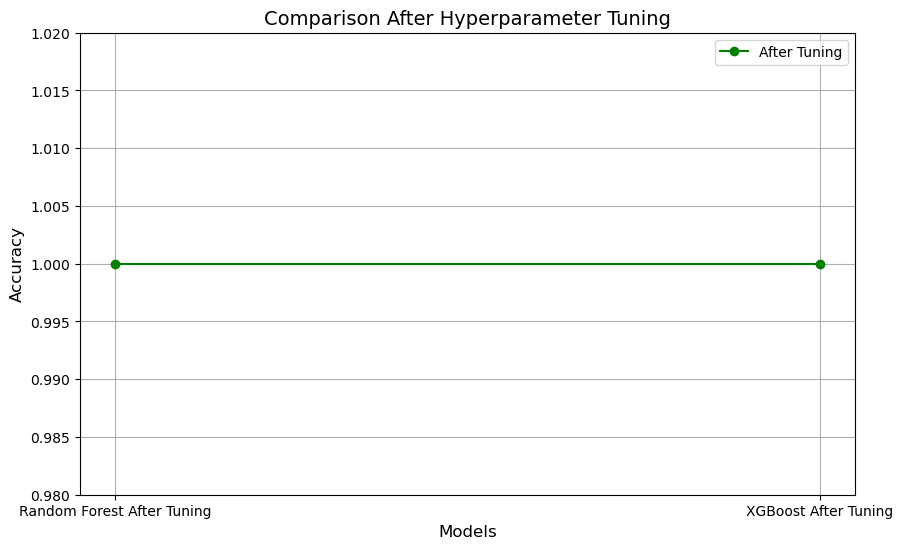

In [ ]:
# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(tuned_models, accuracies_after, marker='o', linestyle='-', color='green', label='After Tuning')

# Set the title and axis labels
plt.title('Comparison After Hyperparameter Tuning', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the plot
plt.ylim(0.98, 1.02)
plt.grid()
plt.legend()
plt.show()

## Bar graph comparison after hyperparameter tuning

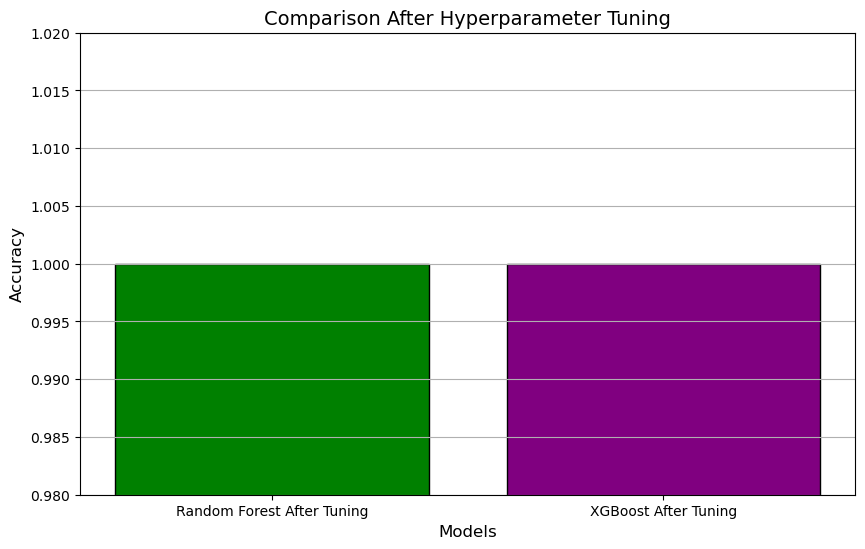

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(tuned_models, accuracies_after, color=['green', 'purple'], edgecolor='black')

# Set title and axis labels
plt.title('Comparison After Hyperparameter Tuning', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the plot
plt.ylim(0.98, 1.02)
plt.grid(axis='y')
plt.show()

## Line plot comparing hypertuned vs non-hypertuned models

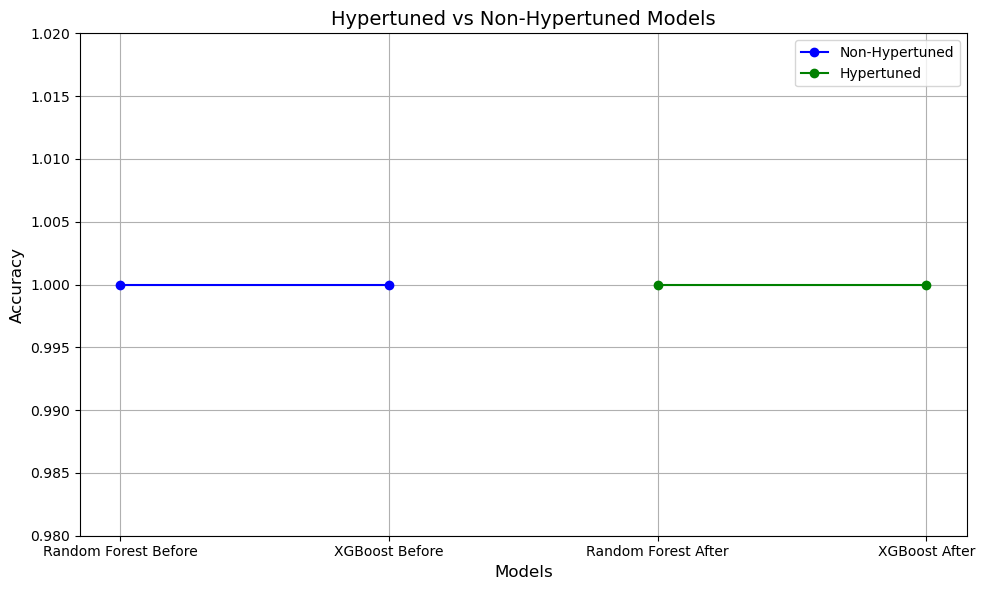

In [ ]:
# Plot the Line plot
plt.figure(figsize=(10, 6))

# Plot non-hypertuned models
plt.plot(['Random Forest Before', 'XGBoost Before'], [rf_accuracy, xgb_accuracy],
         marker='o', linestyle='-', color='blue', label='Non-Hypertuned')

# Plot hypertuned models
plt.plot(['Random Forest After', 'XGBoost After'], [rf_accuracy_after, xgb_accuracy_after],
         marker='o', linestyle='-', color='green', label='Hypertuned')

# Set the title and axis labels
plt.title('Hypertuned vs Non-Hypertuned Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the plo
plt.ylim(0.98, 1.02)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Bar graph comparing hypertuned vs non-hypertuned models

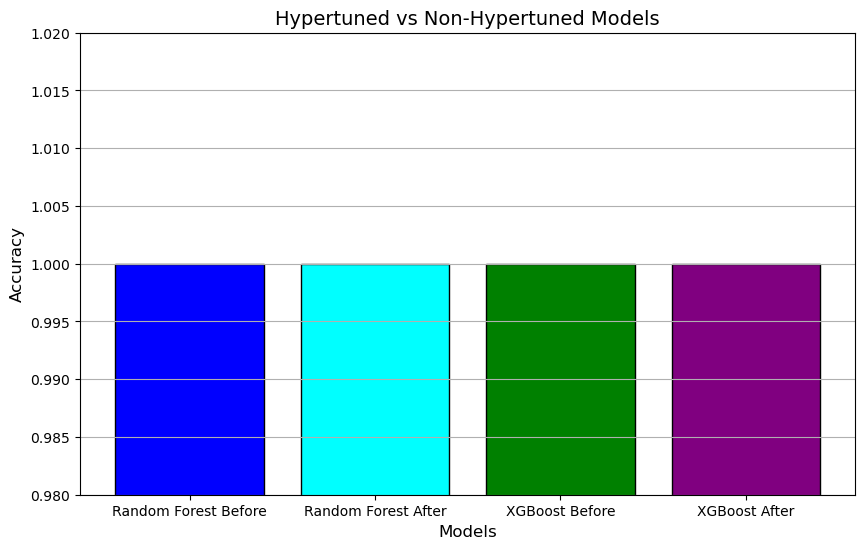

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(hypertuning_vs_not, combined_accuracies, color=['blue', 'cyan', 'green', 'purple'], edgecolor='black')

# Set the title and axis label
plt.title('Hypertuned vs Non-Hypertuned Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the plot
plt.ylim(0.98, 1.02)
plt.grid(axis='y')
plt.show()

## Confusion Matrix

In [ ]:
# Calculate Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# Collect accuracies
models = ['Random Forest', 'SVM', 'XGBoost']
accuracies = [rf_accuracy, svm_accuracy, xgb_accuracy]

## Random Forest Confusion Matrix

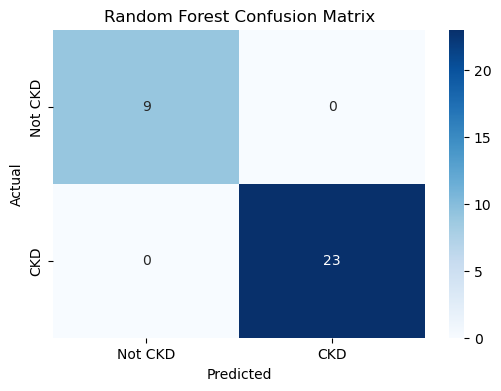

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## SVM Confusion Matrix

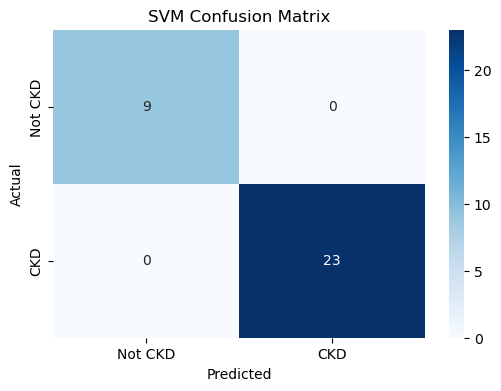

In [ ]:
cm_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title("SVM Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## XGBoost Confusion Matrix

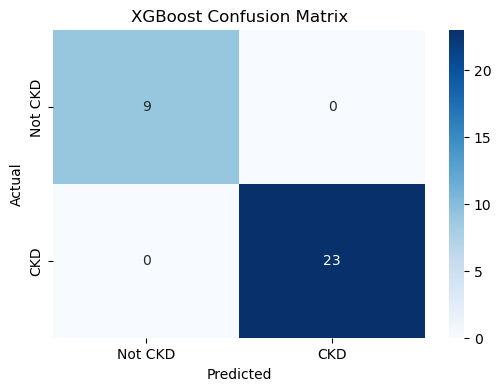

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title("XGBoost Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## ROC Curve

In [ ]:
# Train models
svm.fit(StandardScaler().fit_transform(x_train), y_train)

# Predicted probabilities
rf_probs = rf.predict_proba(x_test)[:, 1]
svm_probs = svm.predict_proba(StandardScaler().fit_transform(x_test))[:, 1]
xgb_probs = xgb.predict_proba(x_test)[:, 1]

# ROC Curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# AUC Scores
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

## Random Forest ROC Curve

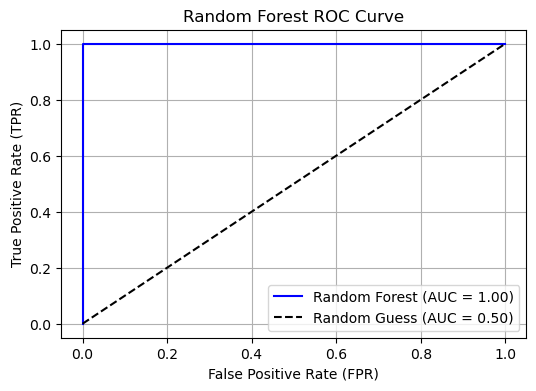

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## SVM ROC Curve

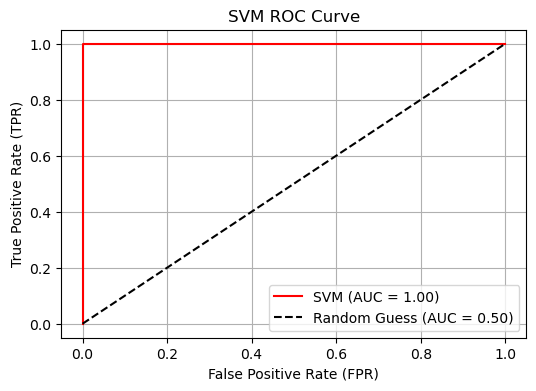

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## XGBoost ROC Curve

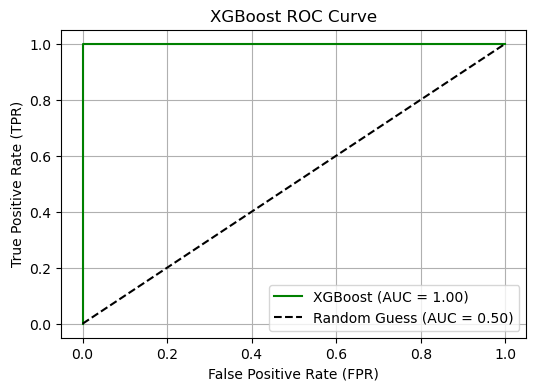

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()